<a href="https://colab.research.google.com/github/SUDAR2005/clustering/blob/main/Agglomerative_Clustering_RNA_Genome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from  sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Clustering/data.csv')
numerical_data=data.iloc[:, 1:]
#numerical_data=numerical_data.iloc[:,:2000]

In [ ]:
print(numerical_data.shape)

(801, 16383)


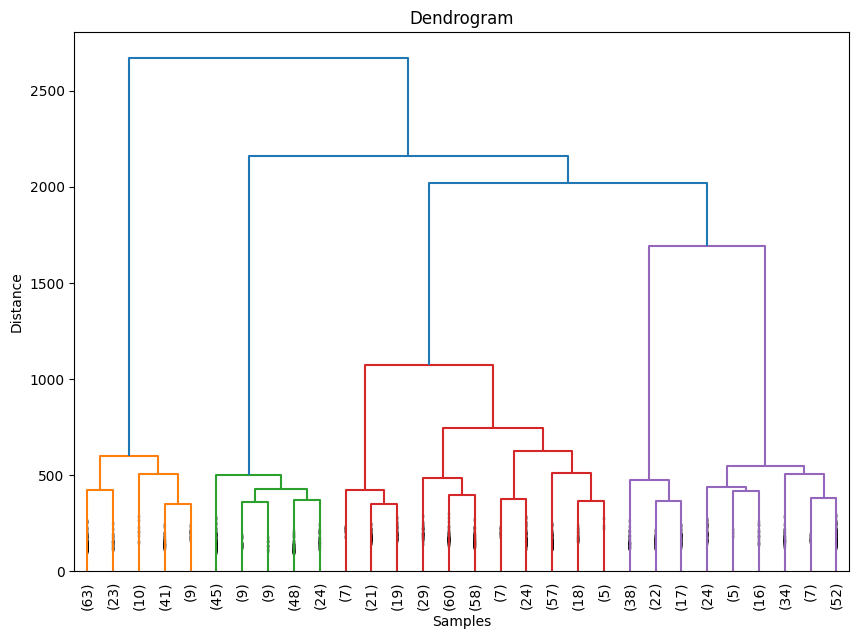

In [ ]:
linked = linkage(numerical_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

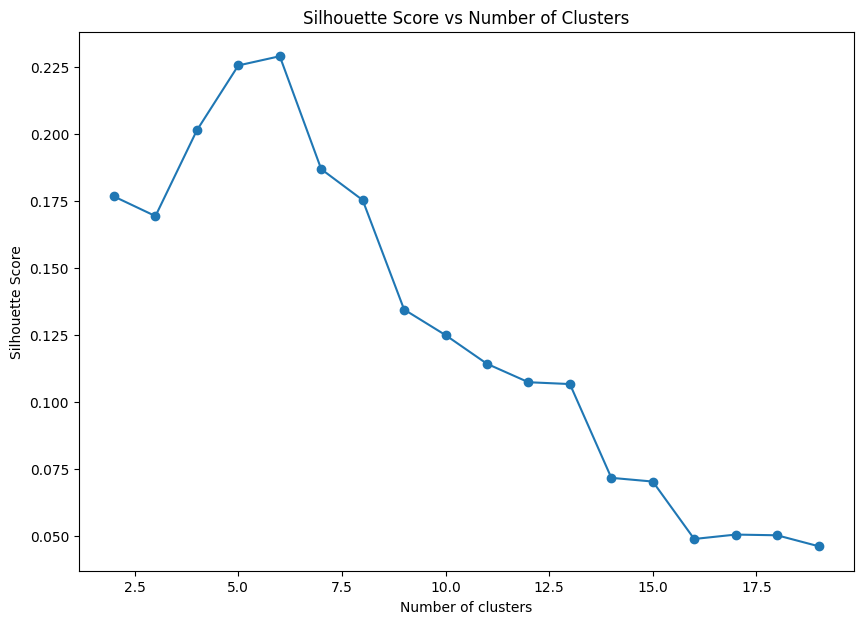

In [ ]:
# Evaluate silhouette scores for a range of cluster numbers
silhouette_scores = []
cluster_range = range(2, 20)

for n_clusters in cluster_range:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(numerical_data)
    silhouette_avg = silhouette_score(numerical_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 7))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


In [ ]:
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters based on silhouette score: {optimal_clusters}')

Optimal number of clusters based on silhouette score: 6


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(numerical_data)

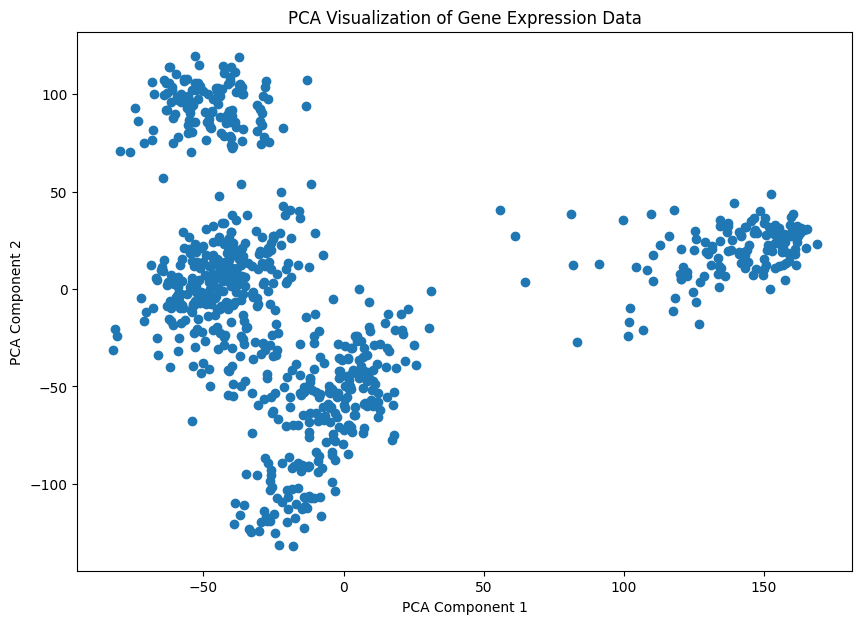

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(numerical_data)

plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Gene Expression Data')
plt.show()

In [ ]:
print(pca_data.shape)

(801, 2)


Clusters found: [0 1 2 3 4]


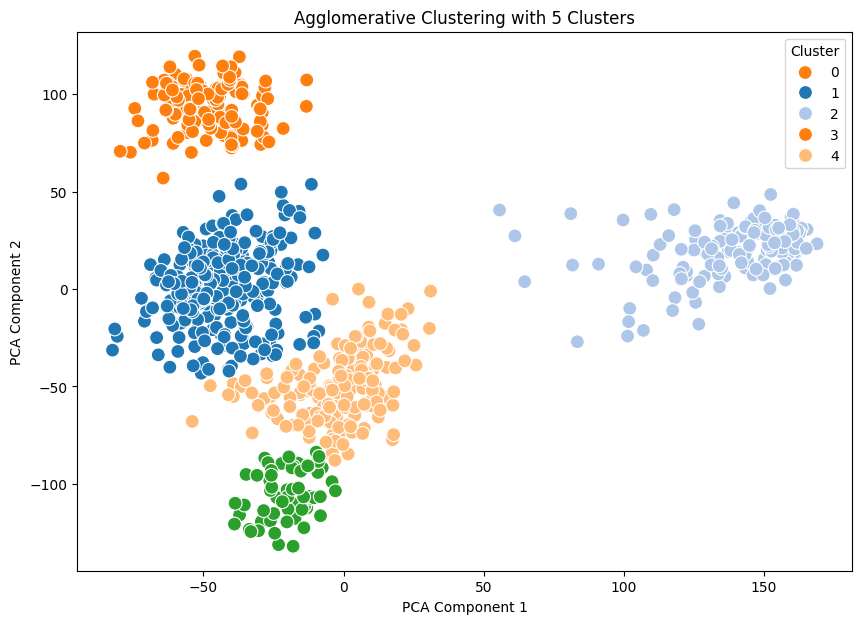

In [ ]:
# Assuming pca_data is your PCA-transformed data
agg_cluster = AgglomerativeClustering(n_clusters=5)
df_high_corr = agg_cluster.fit_predict(pca_data)

# Display the unique cluster labels
unique_clusters = np.unique(df_high_corr)
print("Clusters found:", unique_clusters)

# Plotting
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=pca_data[:, 0],
    y=pca_data[:, 1],
    hue=df_high_corr,
    palette=sns.color_palette("tab20", n_colors=12),
    s=100
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Agglomerative Clustering with 5 Clusters')

# Customize legend to show actual clusters found
plt.legend(title='Cluster', labels=[str(i) for i in unique_clusters])
plt.show()